<h1>GRIP @ The Sparks Foundation</h1>

<h3>IOT and Computer Vision Internship</h3>
    
<h3>Task-1: Object Detection (Aeroplanes)</h3>

<h3>Author: Nitin Nataraj</h3>


<b>Step 1: Importing Libraries, Config files and model graphs</b>


In [1]:
import cv2
import matplotlib.pyplot as plt

config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

<b>Step 2: Initializing the pre-trained model</b>

In [2]:
model=cv2.dnn_DetectionModel(frozen_model, config_file)

<b>Step 3: Importing the labels from COCO dataset</b>

In [3]:
classLabels=[]
file_name = 'labels.txt'
with open(file_name, 'rt') as fptr:
    classLabels=fptr.read().rstrip('\n').split('\n')
#printing data to see labels that can be identified, read image accordingly.
print(classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


<b>Step 4: Setting input scale, size and mean to match mobile-net specifications</b>

In [4]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 00000241EB38C870>

<b>Step 5: Plotting Test Image</b>

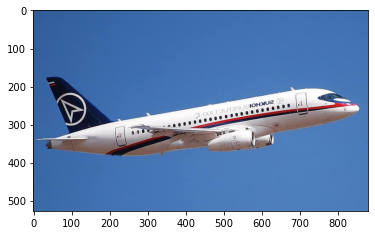

In [5]:
img = cv2.imread('img2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

<b>Step 6: Detection using the pre-trained model</b>

In [6]:
ClassIndex, confidence, bbox= model.detect (img,confThreshold=0.5)

<b>Step 7: Formatting the font and bounded box (color, size, etc)</b>

In [7]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(0,255,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale,color=(0,0,255),thickness=3)

<b>Step 8: Plotting detection output</b>

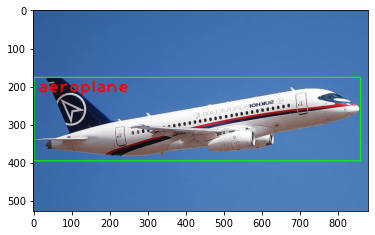

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

<b>Step 9: Testing on further images</b>

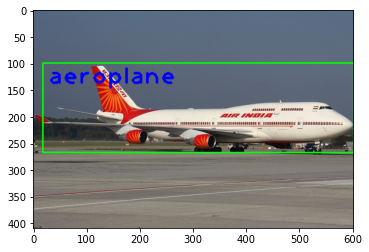

In [9]:
img = cv2.imread('img1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ClassIndex, confidence, bbox= model.detect (img,confThreshold=0.5)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(0,255,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale,color=(255,0,0),thickness=3)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

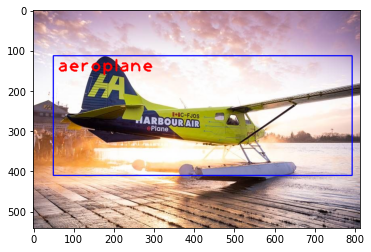

In [10]:
img = cv2.imread('img3.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ClassIndex, confidence, bbox= model.detect (img,confThreshold=0.5)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale,color=(0,0,255),thickness=3)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))